In [1]:
from nlp_preprocessing_functions import *

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


[nltk_data] Downloading package wordnet to /Users/sammy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sammy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# importing dataset

data = pd.read_csv('test.csv') 


# Reviewing the data shape, columns and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


# EDA 

In [3]:
# Percentage of Data Missing Per Column Above 1%

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > .01][:152]

Total  Missing Percent
location   1105        33.864542
keyword      26         0.796813

In [4]:
# Checking for Duplicates 

data[data.duplicated(subset = "text")]

id              keyword                  location  \
53      177           aftershock               Switzerland   
286     924         bioterrorism                       NaN   
600    1947  burning%20buildings                  US of Eh   
612    1998         bush%20fires                       NaN   
1051   3449               derail    w/ @_ridabot, probably   
1072   3546           derailment                       NaN   
1234   4056            displaced  Pedophile hunting ground   
1302   4286             drowning                       NaN   
1489   4949             exploded                       NaN   
1537   5123                fatal                   Gurgaon   
1544   5158                fatal                    Baroda   
1893   6378             hostages           Rocky Mountains   
2043   6868        mass%20murder    Somewhere on the Earth   
2153   7217   natural%20disaster                    Ottawa   
2734   9108       suicide%20bomb                       NaN   
2740   9127       suicide%20bomb                       NaN   
2744   9138       suicide%20bomb                   Nigeria   
2910   9633         thunderstorm  Florence, South Carolina   
3114  10312               weapon                       NaN   
3235  10758             wreckage                     India   

                                                   text  
53    320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...  
286                          To fight bioterrorism sir.  
600   .@denisleary Not sure how these folks rush int...  
612   Bushfire causes first victim in Albania ::  Th...  
1051  @PumpkinMari_Bot lemme just derail this real q...  
1072  Madhya Pradesh Train Derailment: Village Youth...  
1234  .POTUS #StrategicPatience is a strategy for #G...  
1302  Boy saves autistic brother from drowning: A ni...  
1489  that exploded &amp; brought about the\nbeginni...  
1537  11-Year-Old Boy Charged With Manslaughter of T...  
1544  11-Year-Old Boy Charged With Manslaughter of T...  
1893  Sinjar Massacre Yazidis Blast Lack of Action O...  
2043  70 yrs since the atomic bombing of Hiroshima.....  
2153  IRIN Asia | Red tape tangles Nepal reconstruct...  
2734  reaad/ plsss Pic of 16yr old PKK suicide bombe...  
2740  International News Û¢åÊ'Nigeria suicide bomb ...  
2744  #Bestnaijamade: 16yr old PKK suicide bomber wh...  
2910  GSP issues STRONG THUNDERSTORM WILL IMPACT POR...  
3114  #AskConnor there's a zombie apocalypse. the it...  
3235  Wreckage 'Conclusively Confirmed' as From MH37...

In [5]:
# Dropping duplicates because the same text is assigned to both target classes

data.drop_duplicates(subset = ['text'], inplace = True)

In [6]:
# Confirming the drop of the duplicates based of the text column 

data[data.duplicated(subset = "text")]

Empty DataFrame
Columns: [id, keyword, location, text]
Index: []

In [7]:
# Unique words
uniqueWords = list(set(' '.join(data['text']).lower().split(' ')))
count = len(uniqueWords)
print("Here is the total number of unique words: {} \n".format(count))

# Total Words
data['total_words'] = data["text"].apply(lambda x: len(str(x).split(" ")))
total_words = data['total_words'].sum()
print("Here is the total number of words: {} \n".format(total_words))

# Character Count
data['char_count'] = data["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
char_count = np.mean(data['char_count'])
print("Here is the average number of characters: {} \n".format(char_count))

# Sentence Count
data['sentence_count'] = data["text"].apply(lambda x: len(str(x).split(".")))
sentence_count = np.mean(data['sentence_count'])
print("Here is the average number of sentences: {} \n".format(sentence_count))

# Average Word Length in Tweet
data['avg_word_length'] = data['char_count'] / data['total_words']
avg_word_length = np.mean(data['avg_word_length'])
print("Here is the total average length of all tweets: {} \n".format(avg_word_length))

# Average Sentence Length 
data['avg_sentence_lenght'] = data['total_words'] / data['sentence_count']
avg_sentence_lenght = np.mean(data['avg_sentence_lenght'])
print("Here is the total average sentence length: {} \n".format(avg_sentence_lenght))

data.head()

Here is the total number of unique words: 15333 

Here is the total number of words: 48548 

Here is the average number of characters: 88.05797101449275 

Here is the average number of sentences: 2.574776441566451 

Here is the total average length of all tweets: 6.23324255137493 

Here is the total average sentence length: 7.518310144304594 



id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2     NaN      NaN  Heard about #earthquake is different cities, s...   
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...   
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

   total_words  char_count  sentence_count  avg_word_length  \
0            6          29               1         4.833333   
1            9          56               2         6.222222   
2           19          78               1         4.105263   
3            4          37               2         9.250000   
4            8          38               1         4.750000   

   avg_sentence_lenght  
0                  6.0  
1                  4.5  
2                 19.0  
3                  2.0  
4                  8.0

In [8]:
# Tokenizing our text Column for EDA and later cleaning

data['tokenized_text'] = data['text'].parallel_apply(lambda x: tweets_tokenizer(x))

In [9]:
# Checking the addition of the Tokenized Text Column

data.head()

id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2     NaN      NaN  Heard about #earthquake is different cities, s...   
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...   
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

   total_words  char_count  sentence_count  avg_word_length  \
0            6          29               1         4.833333   
1            9          56               2         6.222222   
2           19          78               1         4.105263   
3            4          37               2         9.250000   
4            8          38               1         4.750000   

   avg_sentence_lenght                                     tokenized_text  
0                  6.0          [Just, happened, a, terrible, car, crash]  
1                  4.5  [Heard, about, #earthquake, is, different, cit...  
2                 19.0  [there, is, a, forest, fire, at, spot, pond, ,...  
3                  2.0    [Apocalypse, lighting, ., #Spokane, #wildfires]  
4                  8.0  [Typhoon, Soudelor, kills, 28, in, China, and,...

In [10]:
# Identifing Top 25 common words, before cleaning the tweets

top_25_words = pd.Series(' '.join(data['text']).split()).value_counts()[:25]

print("Here is the top 25 common words, before cleaning: \n\n {} ".format(top_25_words))

# Identify the least 25 uncommon words, before cleaning the tweets

least_25_words = pd.Series(' '.join(data['text']).split()).value_counts()[-25:]

print(" \n\n Here is the least common 25 words, before cleaning: \n\n {} ".format(least_25_words))

Here is the top 25 common words, before cleaning: 

 the     1037
to       805
a        764
of       743
in       733
and      546
I        475
is       371
on       336
for      309
-        300
you      274
my       248
The      240
by       218
with     194
it       188
at       178
that     175
from     167
are      164
be       163
was      155
this     143
like     134
dtype: int64 
 

 Here is the least common 25 words, before cleaning: 

 http://t.co/2PqTm06Lid    1
thing:                    1
??#badgeofhonour          1
@Nataliealana87           1
whale                     1
Nellis                    1
Slosher                   1
Lizzie                    1
Parker                    1
http://t.co/lbkiyfwFlU    1
GPW                       1
EB                        1
cameos.                   1
Voice                     1
RICOCHET                  1
@theblacklink             1
Jeans                     1
http://t.co/hALJNnWrwi    1
console                   1
Enough           

In [11]:
# Dropping ID column by name

data = data.drop(['id'], axis = 1)

In [12]:
# Checking Removal of ID Column

data.head()

keyword location                                               text  \
0     NaN      NaN                 Just happened a terrible car crash   
1     NaN      NaN  Heard about #earthquake is different cities, s...   
2     NaN      NaN  there is a forest fire at spot pond, geese are...   
3     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

   total_words  char_count  sentence_count  avg_word_length  \
0            6          29               1         4.833333   
1            9          56               2         6.222222   
2           19          78               1         4.105263   
3            4          37               2         9.250000   
4            8          38               1         4.750000   

   avg_sentence_lenght                                     tokenized_text  
0                  6.0          [Just, happened, a, terrible, car, crash]  
1                  4.5  [Heard, about, #earthquake, is, different, cit...  
2                 19.0  [there, is, a, forest, fire, at, spot, pond, ,...  
3                  2.0    [Apocalypse, lighting, ., #Spokane, #wildfires]  
4                  8.0  [Typhoon, Soudelor, kills, 28, in, China, and,...

In [13]:
# Looking at the Distribution of Total Words

fig = go.Figure()
fig.add_trace(go.Histogram(x = data['total_words'], 
                           name = "count", 
                           texttemplate = "%{x}", 
                           textfont_size = 20))
fig.show()

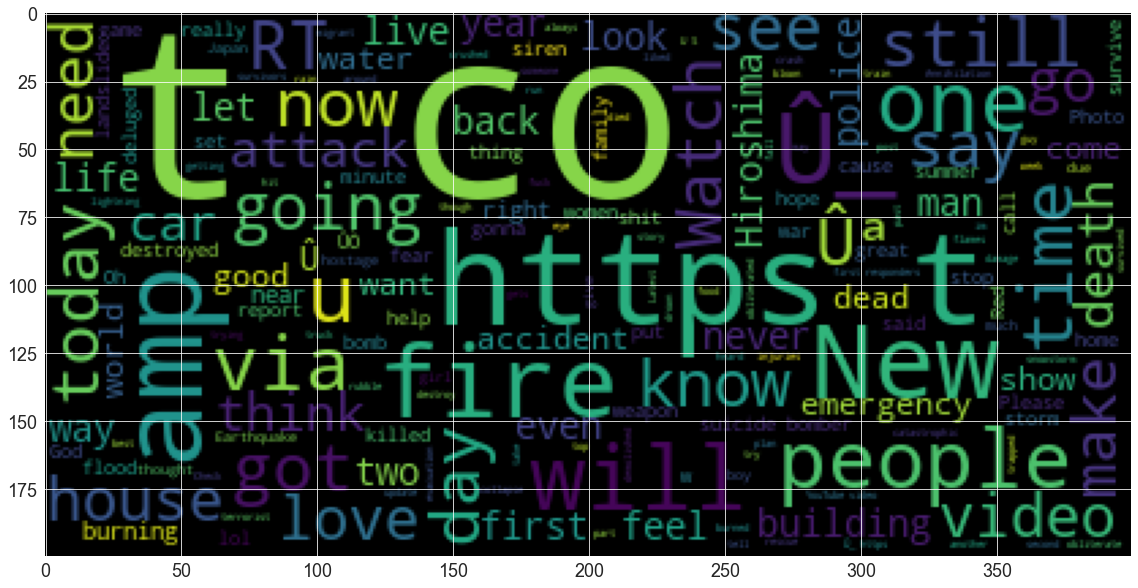

In [14]:
tweet_text = (data['text']).tolist()

tweet_text_as_one_string = ' '.join(tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(tweet_text_as_one_string));

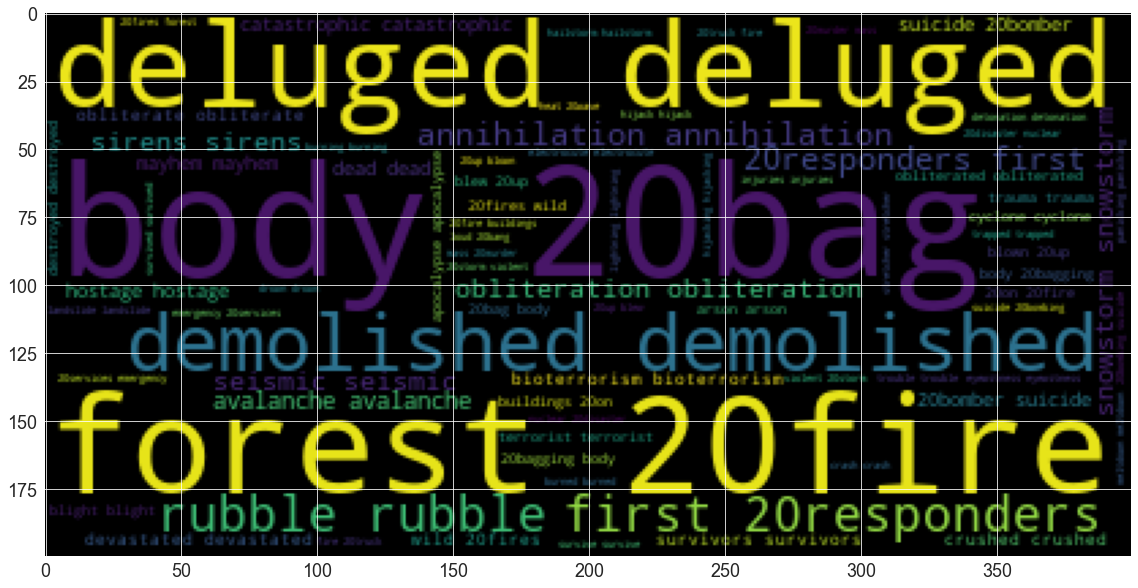

In [15]:
keyword = data['keyword'].dropna()
keyword_tweet_text = keyword.tolist()
keyword_tweet_text_as_one_string = ' '.join(keyword_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(keyword_tweet_text_as_one_string));

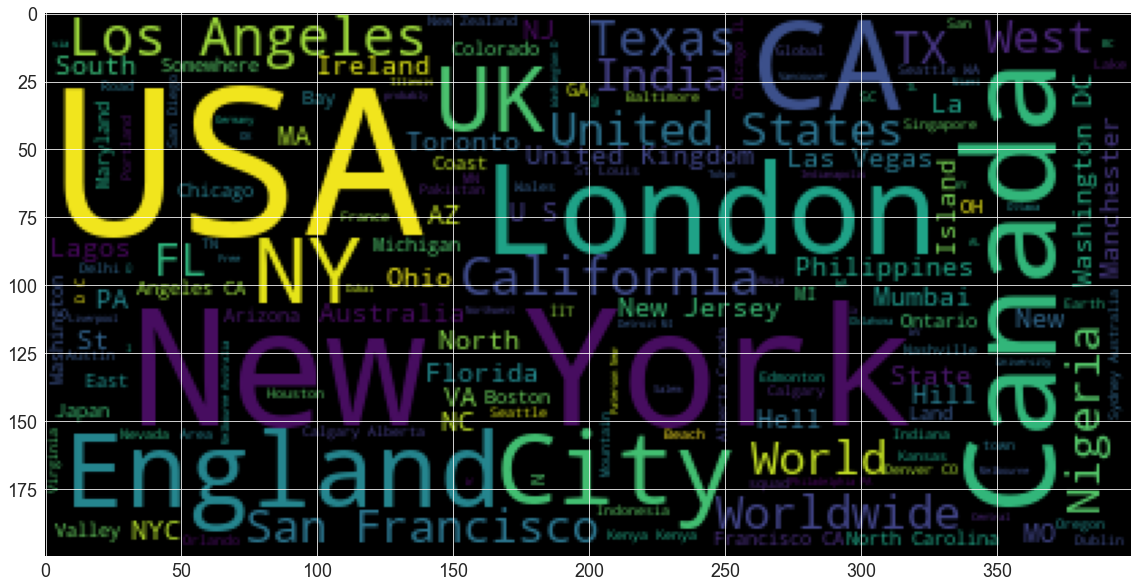

In [16]:
location = data['location'].dropna()
location_tweet_text = location.tolist()
location_tweet_text_as_one_string = ' '.join(location_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(location_tweet_text_as_one_string));

# Cleaning

In [17]:
# Using the NLP Preprocessing Functions from the Py File for Cleaning

In [18]:
sample = data.text[500]

In [19]:
sample

'#Hiroshima marks 70th anniversary of atomic bombing ( via NHK WORLD News) http://t.co/qGWoyNJLY8'

In [20]:
text_preprocesser_nlp(sample)

'mark anniversary atomic bombing world news'

In [21]:
# Converting emojis to text

data['clean_text'] = data['text'].apply(emoji.demojize)

In [22]:
# Cleaning the entire text column for the train  dataset

data['clean_text'] = data.clean_text.parallel_apply(lambda clean_text: text_preprocesser_nlp(clean_text))

In [23]:
# Reviewing Random Sample of Clean Text Column

data.clean_text.sample(frac = .3)

2102                          hama yes midsummer meltdown
1374                                   job case emergency
2417        tech assist open rescue pocket knife new blue
604     attack attack woman health attack woman health...
1827                    graham phillips fundraiser cancel
                              ...                        
445     people bag rouse body shit love body like ridi...
1451    school fucking dumb set evacuation siren accident
2182    nuclear deal japan pact lie heart reactor base...
2449                                         rescuer find
2758    guardian islamic state claim suicide bomb saud...
Name: clean_text, Length: 973, dtype: object

In [24]:
# Removing low occurrence words (Word count of less than 5)

freq = pd.Series(' '.join(data['clean_text']).split()).value_counts()
low_freq = list(freq.loc[freq < 5].index)
data['clean_text'] = data['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

In [25]:
# Reviewing a Random Sample of the Dataframe text column

data.sample(frac = .2)

keyword                 location  \
3116             weapon  Pune, Maharashtra India   
1551           fatality   Sericita, Minas Gerais   
8                   NaN                      NaN   
2186  nuclear%20reactor                      NaN   
1137        destruction                      NaN   
...                 ...                      ...   
13                  NaN                      NaN   
2440           rescuers    Los Angeles, CA 90045   
2521          sandstorm                      USA   
754             collide                      NaN   
3164           wildfire          Tucson, Arizona   

                                                   text  total_words  \
3116  On 70th anniversary of #Hiroshima bomb it is i...           17   
1551           @martinsymiguel @FilipeCoelho92 FATALITY            3   
8                                      What a nice hat?            4   
2186  #NuclearPower Global Nuclear Reactor Construct...           18   
1137  World of Warcraft: Legion Revealed at gamescom...           18   
...                                                 ...          ...   
13                                            What if?!            2   
2440  Bay Whale Worries Rescuers http://t.co/nfKTvVLWHm            5   
2521  Watch This Airport Get Swallowed Up By A Sands...           14   
754   Now there's only 2 days for collide!!! get sig...           11   
3164  Here's a quick timelapse I made of the Finger ...           24   

      char_count  sentence_count  avg_word_length  avg_sentence_lenght  \
3116          81               2         4.764706                  8.5   
1551          38               1        12.666667                  3.0   
8             13               1         3.250000                  4.0   
2186         122               6         6.777778                  3.0   
1137         119               5         6.611111                  3.6   
...          ...             ...              ...                  ...   
13             8               1         4.000000                  2.0   
2440          45               2         9.000000                  2.5   
2521          78               2         5.571429                  7.0   
754           70               2         6.363636                  5.5   
3164         116               2         4.833333                 12.0   

                                         tokenized_text  \
3116  [On, 70th, anniversary, of, #Hiroshima, bomb, ...   
1551       [@martinsymiguel, @FilipeCoelho92, FATALITY]   
8                               [What, a, nice, hat, ?]   
2186  [#NuclearPower, Global, Nuclear, Reactor, Cons...   
1137  [World, of, Warcraft, :, Legion, Revealed, at,...   
...                                                 ...   
13                                     [What, if, ?, !]   
2440  [Bay, Whale, Worries, Rescuers, http://t.co/nf...   
2521  [Watch, This, Airport, Get, Swallowed, Up, By,...   
754   [Now, there's, only, 2, days, for, collide, !,...   
3164  [Here's, a, quick, timelapse, I, made, of, the...   

                                             clean_text  
3116  anniversary bomb important learn history ban w...  
1551                                           fatality  
8                                              nice hat  
2186  global nuclear reactor market grow nuclear rea...  
1137  world aircraft legion game burn legion return ...  
...                                                 ...  
13                                                       
2440                                        bay rescuer  
2521             watch airport swallow sandstorm minute  
754                                    day collide sign  
3164              quick finger rock fire night pm check  

[649 rows x 10 columns]

# EDA, Post Cleaning 

In [26]:
# Clean Unique words
clean_unique_words = list(set(' '.join(data['clean_text']).lower().split(' ')))
clean_count = len(clean_unique_words)
print("Here is the total number of clean unique words: {} \n".format(clean_count))

# Clean Total Words
data['clean_total_words'] = data["clean_text"].apply(lambda x: len(str(x).split(" ")))
clean_total_words = data['clean_total_words'].sum()
print("Here is the total number of clean words: {} \n".format(clean_total_words))

# Clean Character Count
data['clean_char_count'] = data["clean_text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
clean_char_count = np.mean(data['clean_char_count'])
print("Here is the average number of clean characters: {} \n".format(clean_char_count))

# Clean Sentence Count
data['clean_sentence_count'] = data["clean_text"].apply(lambda x: len(str(x).split(".")))
clean_sentence_count = np.mean(data['clean_sentence_count'])
print("Here is the average number of clean sentences: {} \n".format(clean_sentence_count))

# Average Word Length in Tweet
data['clean_avg_word_length'] = data['clean_char_count'] / data['clean_total_words']
clean_avg_word_length = np.mean(data['clean_avg_word_length'])
print("Here is the total average of lengths in the clean tweets: {} \n".format(clean_avg_word_length))

# Average Sentence Length 
data['clean_avg_sentence_lenght'] = data['clean_total_words'] / data['clean_sentence_count']
clean_avg_sentence_lenght = np.mean(data['clean_avg_sentence_lenght'])
print("Here is the total clean average sentence length: {} \n".format(clean_avg_sentence_lenght))

data.head()

Here is the total number of clean unique words: 1146 

Here is the total number of clean words: 16559 

Here is the average number of clean characters: 27.397163120567377 

Here is the average number of clean sentences: 1.0 

Here is the total average of lengths in the clean tweets: 5.407696944676594 

Here is the total clean average sentence length: 5.106074622263336 



keyword location                                               text  \
0     NaN      NaN                 Just happened a terrible car crash   
1     NaN      NaN  Heard about #earthquake is different cities, s...   
2     NaN      NaN  there is a forest fire at spot pond, geese are...   
3     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

   total_words  char_count  sentence_count  avg_word_length  \
0            6          29               1         4.833333   
1            9          56               2         6.222222   
2           19          78               1         4.105263   
3            4          37               2         9.250000   
4            8          38               1         4.750000   

   avg_sentence_lenght                                     tokenized_text  \
0                  6.0          [Just, happened, a, terrible, car, crash]   
1                  4.5  [Heard, about, #earthquake, is, different, cit...   
2                 19.0  [there, is, a, forest, fire, at, spot, pond, ,...   
3                  2.0    [Apocalypse, lighting, ., #Spokane, #wildfires]   
4                  8.0  [Typhoon, Soudelor, kills, 28, in, China, and,...   

                      clean_text  clean_total_words  clean_char_count  \
0      happen terrible car crash                  4                22   
1  hear different city stay safe                  5                25   
2   forest fire spot street save                  5                24   
3                     apocalypse                  1                10   
4   typhoon counselor kill china                  4                25   

   clean_sentence_count  clean_avg_word_length  clean_avg_sentence_lenght  
0                     1                   5.50                        4.0  
1                     1                   5.00                        5.0  
2                     1                   4.80                        5.0  
3                     1                  10.00                        1.0  
4                     1                   6.25                        4.0

In [27]:
# Identifing Top 25 common words

clean_top_25_words = pd.Series(' '.join(data['clean_text']).split()).value_counts()[:25]

print("Here is the top 25 common words, after cleaning: \n\n {} ".format(clean_top_25_words))

# Identify the least 25 uncommon words

clean_least_25_words = pd.Series(' '.join(data['clean_text']).split()).value_counts()[-25:]

print(" \n\n Here is the least common 25 words, after cleaning: \n\n {} ".format(clean_least_25_words))

Here is the top 25 common words, after cleaning: 

 like         166
fire         164
new          114
go           102
get           90
people        90
attack        85
burn          80
news          75
kill          73
emergency     73
year          71
watch         68
time          67
crash         66
come          64
think         64
video         63
bomb          63
pm            62
know          60
disaster      59
storm         58
service       56
police        55
dtype: int64 
 

 Here is the least common 25 words, after cleaning: 

 combo       5
jackson     5
bear        5
disney      5
gas         5
number      5
chief       5
worth       5
estimate    5
view        5
move        5
nigeria     5
notice      5
digital     5
shirt       5
register    5
killer      5
rome        5
trailer     5
board       5
store       5
office      5
career      5
flat        5
reduce      5
dtype: int64 


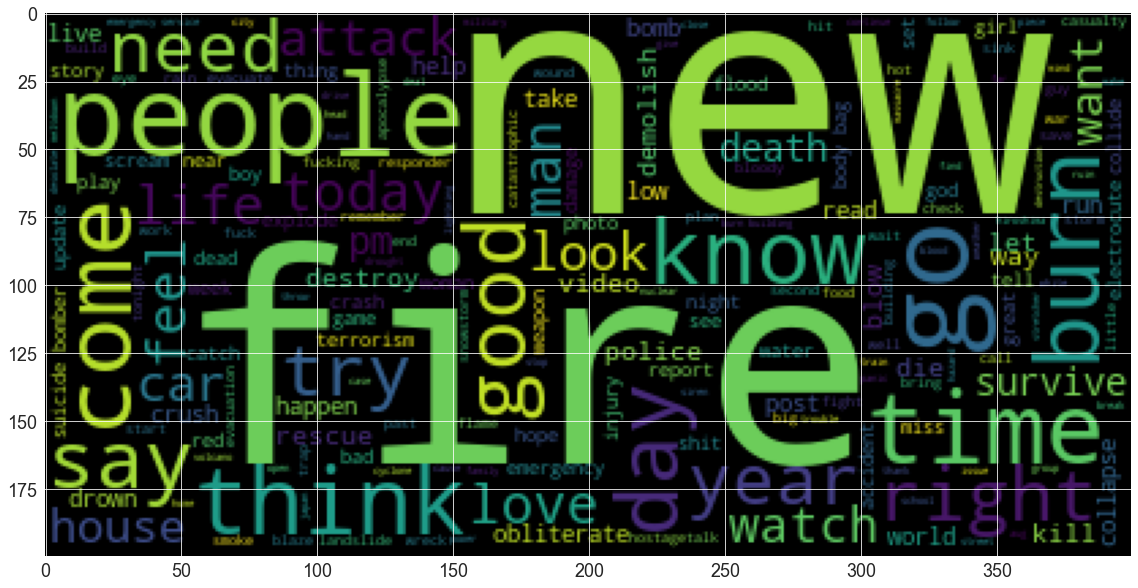

In [28]:
clean_tweet_text = (data['clean_text']).tolist()

clean_tweet_text_as_one_string = ' '.join(clean_tweet_text)

plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(clean_tweet_text_as_one_string));

In [29]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = data['clean_total_words'], 
                           name = "count", 
                           texttemplate = "%{x}", 
                           textfont_size = 20))
fig.show()

In [31]:
data.to_csv('preprocessed_clean_test_set.csv', index = False)